<a href="https://colab.research.google.com/github/sailesh3373/Data-Analysis-with-Python/blob/main/predict_stock_price_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# This program uses a artificial recurrent neural network called Long Short Term Memory(LSTM)
# to predict the closing stock price of Verde Agritech PLC(NPK)using the past 60 days closing price

In [25]:
# Import the libraries
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [26]:
# Get the stock value
df = web.DataReader('NPK', data_source='yahoo', start='2016-01-01', end='2021-06-22')
# Show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,81.970001,78.230003,81.970001,79.330002,46900.0,55.760872
2016-01-05,80.889999,78.080002,79.330002,78.910004,36200.0,55.465656
2016-01-06,80.589996,77.529999,78.320000,78.330002,32800.0,55.057972
2016-01-07,77.550003,75.430000,76.669998,76.580002,33200.0,53.827904
2016-01-08,79.199997,75.440002,76.669998,76.010002,42700.0,53.427250
...,...,...,...,...,...,...
2021-06-16,104.080002,102.459999,103.669998,102.620003,13800.0,102.620003
2021-06-17,102.220001,100.269997,102.220001,101.000000,10500.0,101.000000
2021-06-18,99.620003,97.029999,99.019997,97.690002,57500.0,97.690002


In [27]:
# Display the size of data
df.shape

(1377, 6)

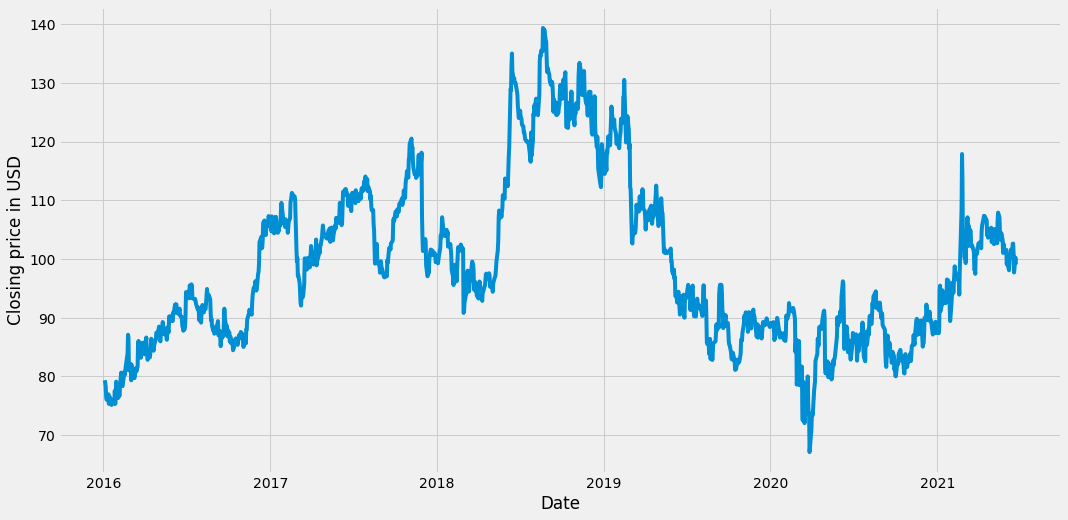

In [28]:
# Visualizing the stock closing price
plt.figure(figsize=(16, 8))
plt.title='Closing price history of Verde Agritech PLC(NPK)'
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price in USD')
plt.show()

In [29]:
# Create a new dataframe including only closing price
data = df.filter(['Close'])
#Convert the dataframe into numpy array
dataset = data.values
# Get the no of rows to train our Model, We use 80% of our data to train the model
train_len = math.ceil(len(dataset) * 0.8)
train_len

1102

In [30]:
# Scaling the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16938837],
       [0.16357605],
       [0.15554946],
       ...,
       [0.42347083],
       [0.45862168],
       [0.44270691]])

In [31]:
# Create the trining Data set
train_data = scaled_data[0 : train_len, :]

print(len(train_data))

1102


In [32]:
# Split the data into x_train and y_train sets
x_train = []
y_train = []
for i in range(90, len(train_data)):
  x_train.append(train_data[i-90:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 91:
    print(x_train)
    print(y_train)
    print()

[array([0.16938837, 0.16357605, 0.15554946, 0.13133136, 0.12344319,
       0.13160809, 0.13617496, 0.11375588, 0.13119294, 0.12911709,
       0.11112656, 0.12385834, 0.11500144, 0.12136733, 0.11458629,
       0.14447829, 0.11375588, 0.13340722, 0.16606696, 0.14876832,
       0.12731806, 0.15015229, 0.15112101, 0.13174651, 0.17672298,
       0.1873789 , 0.17561584, 0.15679491, 0.15554946, 0.18862445,
       0.18212015, 0.19319132, 0.20204822, 0.22488234, 0.23277062,
       0.27663995, 0.26930534, 0.19249933, 0.19803492, 0.20772212,
       0.16924995, 0.20564626, 0.19858849, 0.18391917, 0.17589268,
       0.17437039, 0.17824527, 0.19720451, 0.19111546, 0.1987268 ,
       0.20135623, 0.25823417, 0.26197063, 0.23456964, 0.25781902,
       0.22239144, 0.24702468, 0.23733738, 0.25837259, 0.23733738,
       0.23041793, 0.23498479, 0.27013564, 0.23069476, 0.23290893,
       0.21754773, 0.22931089, 0.22737335, 0.22363689, 0.23858294,
       0.25062273, 0.26722948, 0.25560474, 0.2520067 , 0.2389

In [33]:
# Convert the x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
# Reshape the data; Reshaping the data is necessary because the LSTM neural network expects 3-dimensional
# in the form of no. of samples, no. of time stamps and no. of features
# data while our data is still 2 dimensional so we reshape our data to make it 3-D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1012, 90, 1)

In [35]:
# Build the LSTM Model
#Create the object of Sequential
model = Sequential()
# Add the LSTM with 50 Neurons and return_sequence = True bacause we're going to add another LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
# Add Dense Layer with 25 Neurons
model.add(Dense(25))
model.add(Dense(1))


In [36]:
# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
# Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1012/1012 [==============================] - 36s 33ms/step - loss: 0.0111


In [39]:
# Create the Testing Dataset
# Create the new array containing scaled value from 1012 to 1377(to end)
# train_len = 1102 and train_len - 90 = 1012
test_data = scaled_data[train_len - 90: , :] 
# Create the dataset x_test and y_test
x_test = []
y_test = dataset[train_len : , :]
for i in range(90, len(test_data)):
  x_test.append(test_data[i - 90: i, 0])

In [40]:
# Convert the dataset to numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [41]:
# Get the Model's predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [42]:
# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))

rmse

3.8279849304446394

In [43]:
# Plot the Data
train = data[ : train_len]
valid = data[train_len : ]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


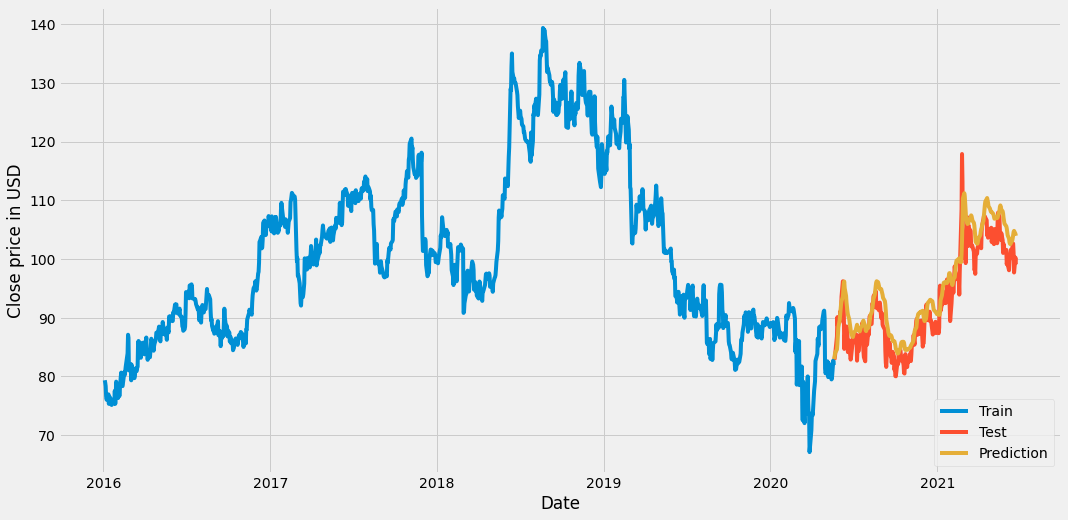

In [45]:
#Visualize the data
plt.figure(figsize=(16, 8))
plt.title = 'Model'
plt.xlabel('Date')
plt.ylabel('Close price in USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Prediction'], loc = 'lower right')
plt.show()


In [46]:
valid.tail(30)

,Close,Predictions
Date,,
2021-05-11,105.010002,106.939674
2021-05-12,102.669998,107.138115
2021-05-13,106.500000,107.038918
2021-05-14,107.889999,107.427574
2021-05-17,107.110001,108.191254
2021-05-18,104.760002,108.898544
2021-05-19,103.480003,109.115036
2021-05-20,103.239998,108.879135
2021-05-21,104.410004,108.427383
